In [306]:
from sympy import *

***Ejemplo 6***

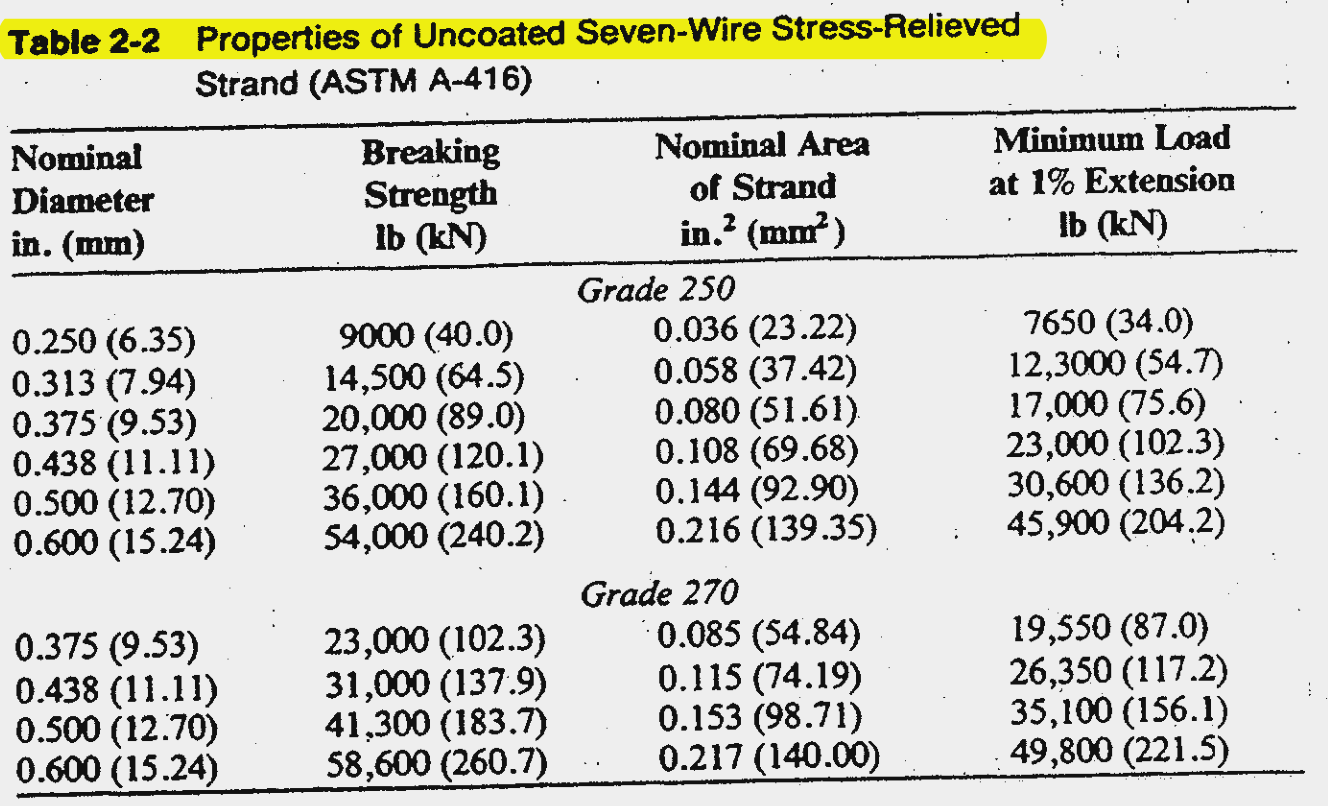

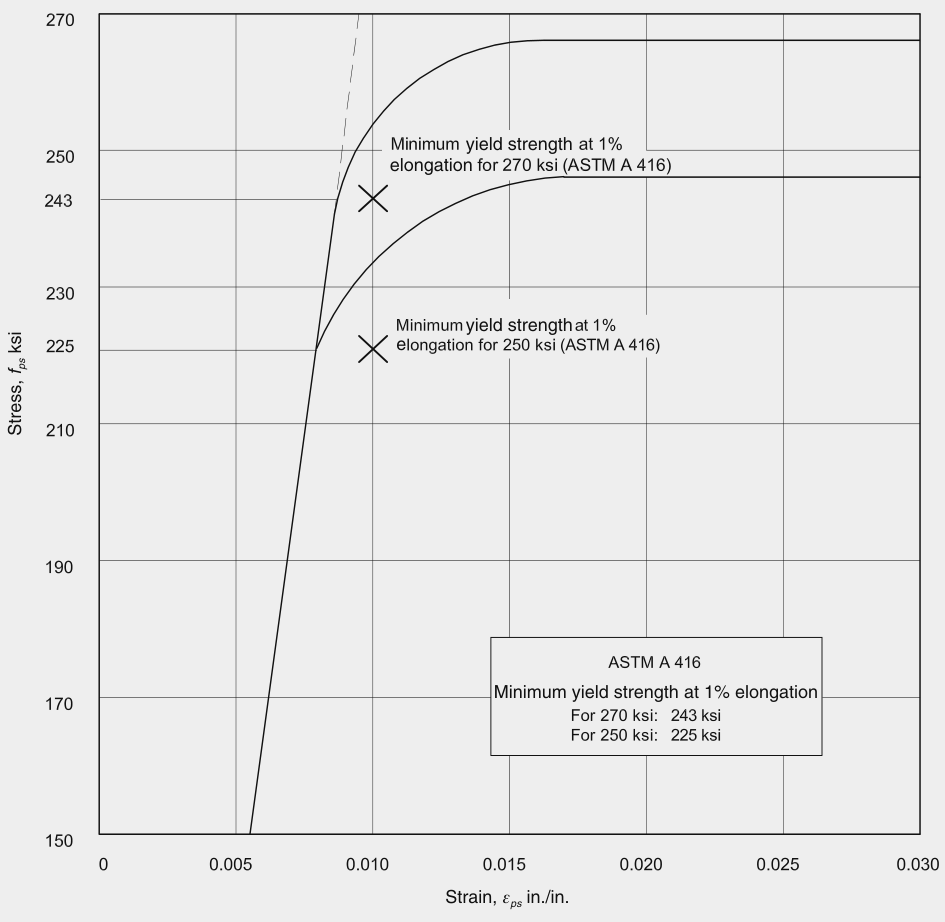

**Usar el Metodo de Compatibilidad de Deformaciones**

**Viga Pretensada**

In [307]:
# Datos #
# Propiedades de los materiales (concreto y acero de presfuerzo)
fc=280 # kgf/cm2
Ec=15000*fc**.5 # kgf/cm2
ecu=.003 # Adimensional
beta1=.85 # Adimensional
nh=7 # Numero de alambres
A1_2=92.9 # mm2 # Area de un alambre de 1/2 in
Ap=(nh*A1_2)*10**-2 # cm2 # Area de los alambres
Pe=65320 # kgf Fuerza de presfuerzo efectivo
Ep=27000*10**3/(2.2*2.54**2) # kgf/cm2 # Modulo de elasticidad del acero de presfuerzo

# Propiedades fisicas de la viga pretensada
bf=30 # cm
hf=12.5 # cm
h=60 # cm
d=h-17 # cm Peralte efectivo
tw=10 # cm
dp=17 # cm Distancia del presfuerzo a la fibra inferior

# Determinacion de las propiedades de la seccion
Ac=2*hf*bf+tw*(h-2*hf)
cg=(hf*bf*hf/2+tw*(h-2*hf)*(h/2)+hf*bf*(h-hf/2))/Ac # cm3 Centroide (*)
I=bf*hf**3/12*2+tw*(h-2*hf)**3/12+hf*bf*(cg-hf/2)**2+hf*bf*(h-cg-hf/2)**2+tw*(h-2*hf)*(h/2-cg)**2 # cm4 # Inercia (*)
r=(I/Ac)**.5 # cm Radio de giro (*)
s=I/cg # cm3 Modulo de seccion (*)
eg=cg-dp # cm Distancia del presfuerzo al centroide

# Salida de resultados
print ("Area de la seccion: ",round(Ac,2)," cm2")
print ("Centroide: ",round(cg,2)," cm")
print ("Inercia: ",round(I,2)," cm4")
print ("Radio de giro: ",round(r,2)," cm")
print ("Modulo de seccion: ",round(s,2)," cm3")
print ("Distancia del presfuerzo al centroide: ",round(eg,2)," cm")

Area de la seccion:  1100.0  cm2
Centroide:  30.0  cm
Inercia:  468541.67  cm4
Radio de giro:  20.64  cm
Modulo de seccion:  15618.06  cm3
Distancia del presfuerzo al centroide:  13.0  cm


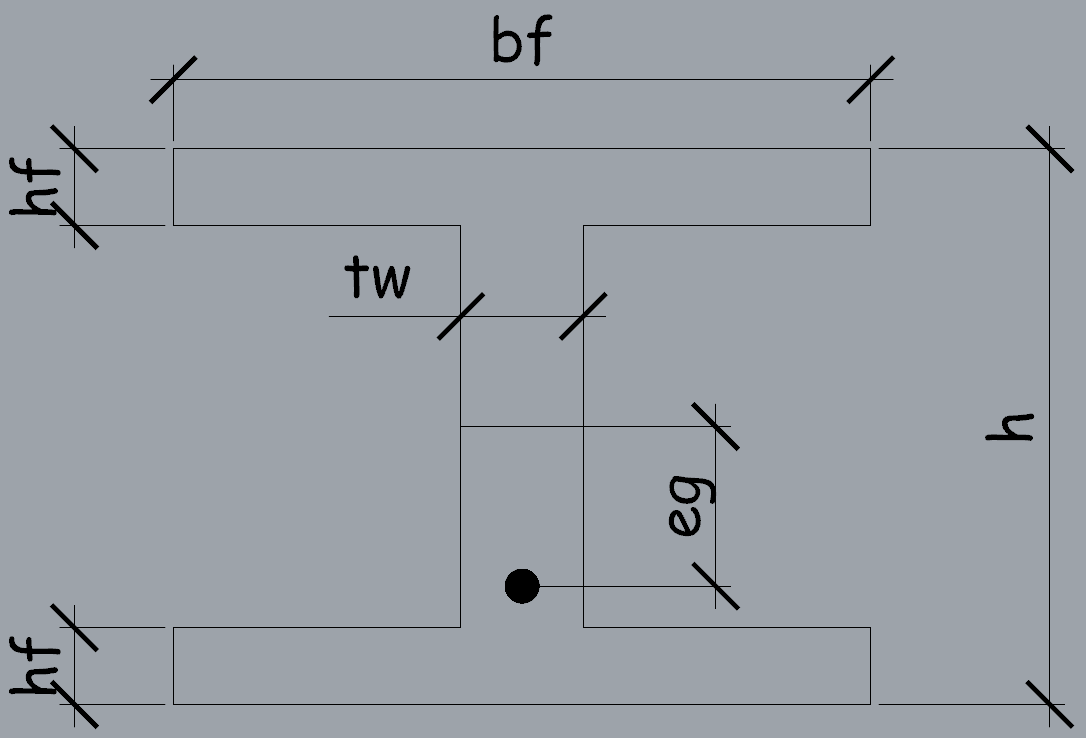

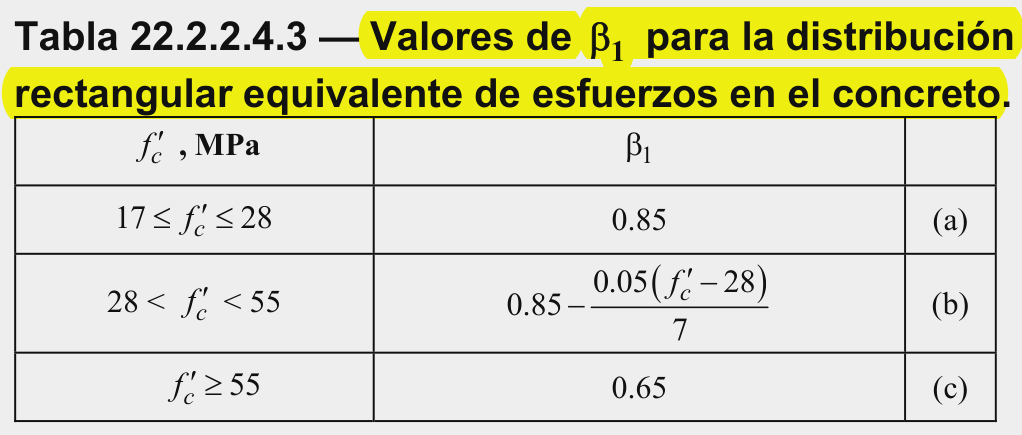

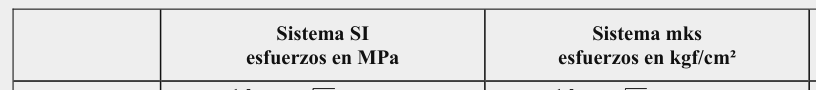

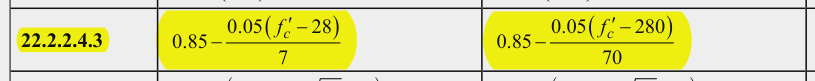

**Resolucion**

In [308]:
fpe=Pe/Ap # kgf/cm2 # Esfuerzo de presfuerzo efectivo
epse=fpe/Ep # Adimensional # 1ra Deformacion del presfuerzo
e1=epse
e2=Pe/(Ac*Ec)*(1+eg**2/r**2) # Adimensional # 2da Deformacion del presfuerzo
print ("Esfuerzo de presfuerzo efectivo: ",round(fpe,2)," kgf/cm2")
print ("1ra Deformacion del presfuerzo: ",round(e1,6)," Adimensional")
print ("2da Deformacion del presfuerzo: ",round(e2,6)," Adimensional")

Esfuerzo de presfuerzo efectivo:  10044.59  kgf/cm2
1ra Deformacion del presfuerzo:  0.00528  Adimensional
2da Deformacion del presfuerzo:  0.00033  Adimensional


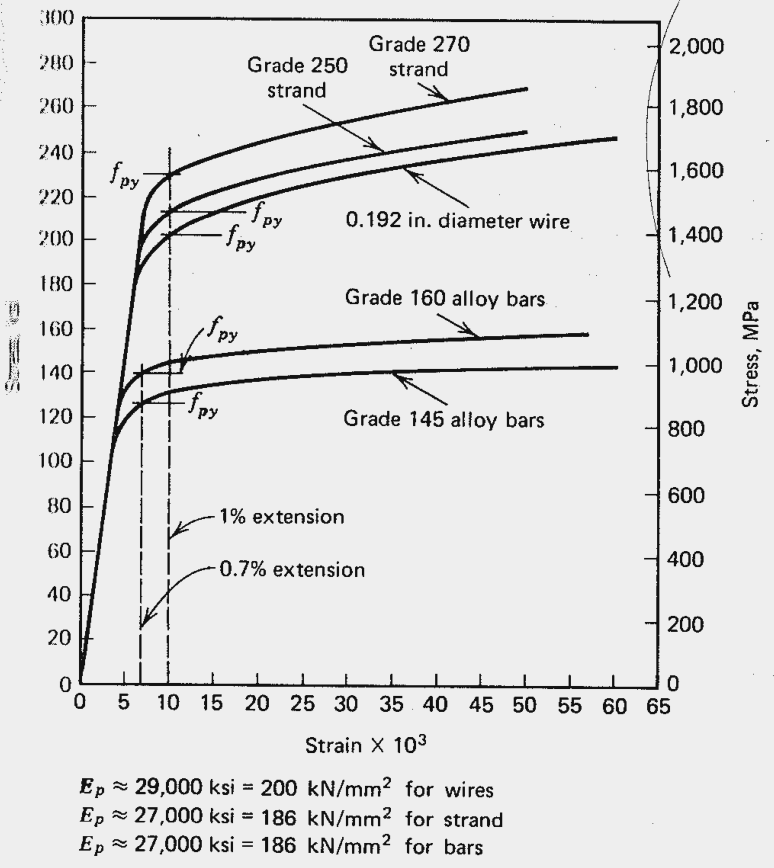

In [309]:
# 1ra Suposicion (Esfuerzo de falla para el presfuerzo)
fpf1=14000 # kgf/cm2 Esfuerzo de falla para el presfuerzo

# De la grafica la deformacion para este esfuerzo es de 0.007
epf1=0.007 # Adimensional Deformacion para el esfuerzo de falla

a=Ap*fpf1/(.85*fc*bf) # cm Profundidad de la zona de compresion
c=a/beta1 # cm Distancia del Eje Neutro a la fibra en compresion
e3=ecu*(d-c)/c # Adimensional # 3ra Deformacion del presfuerzo
et=sum([e1,e2,e3]) # Adimensional # Deformacion total del presfuerzo

# Comparamos este valor con la deformacion de la grafica
dif=et-epf1 # Adimensional # Diferencia entre la deformacion total y la de la grafica
print ("Deformacion total del presfuerzo: ",round(et,6))
print ("Diferencia entre la deformacion total y la de la grafica: ",round(dif,6))

Deformacion total del presfuerzo:  0.01121
Diferencia entre la deformacion total y la de la grafica:  0.00421


In [310]:
# 2da Suposicion (Esfuerzo de falla para el presfuerzo)
fpf1=14500 # kgf/cm2 Esfuerzo de falla para el presfuerzo

# De la grafica la deformacion para este esfuerzo es de 0.007
epf1=0.0095 # Adimensional Deformacion para el esfuerzo de falla

a=Ap*fpf1/(.85*fc*bf) # cm Profundidad de la zona de compresion
c=a/beta1 # cm Distancia del Eje Neutro a la fibra en compresion
e3=ecu*(d-c)/c # Adimensional # 3ra Deformacion del presfuerzo
et=sum([e1,e2,e3]) # Adimensional # Deformacion total del presfuerzo

# Comparamos este valor con la deformacion de la grafica
dif=et-epf1 # Adimensional # Diferencia entre la deformacion total y la de la grafica
print ("Deformacion total del presfuerzo: ",round(et,6))
print ("Diferencia entre la deformacion total y la de la grafica: ",round(dif,6))

Deformacion total del presfuerzo:  0.010914
Diferencia entre la deformacion total y la de la grafica:  0.001414


**Ejemplo 7**

**Usar el Metodo ACI**

**Viga Pretensada**

In [311]:
# Datos #
# Propiedades de los materiales (concreto y acero de presfuerzo)
fc=4 # klb/in2
Ec=15000*fc**.5 # klb/in2
ecu=.003 # Adimensional
beta1=.85 # Adimensional
nh=7 # Numero de alambres
A1_2=.144 # in2 # Area de un alambre de 1/2 in
Ap=nh*A1_2 # in2 # Area de los alambres
Pe=144 # klb Fuerza de presfuerzo efectivo
Ep=27000*10**3 # klb/in2 # Modulo de elasticidad del acero de presfuerzo
fpu=250 # klb/in2 # Esfuerzo utlimo del presfuerzo
fpy=210 # klb/in2 # Esfuerzo de fluencia del presfuerzo

# Propiedades fisicas de la viga pretensada
bf=12 # in
hf=5 # in
h=24 # in
d=17.19 # in Peralte efectivo
tw=4 # in
dp=12-5.19 # in Distancia del presfuerzo a la fibra inferior

# Determinacion de las propiedades de la seccion
Ac=2*hf*bf+tw*(h-2*hf)
cg=(hf*bf*hf/2+tw*(h-2*hf)*(h/2)+hf*bf*(h-hf/2))/Ac # in3 Centroide (*)
I=bf*hf**3/12*2+tw*(h-2*hf)**3/12+hf*bf*(cg-hf/2)**2+hf*bf*(h-cg-hf/2)**2+tw*(h-2*hf)*(h/2-cg)**2 # in4 # Inercia (*)
r=(I/Ac)**.5 # in Radio de giro (*)
s=I/cg # in3 Modulo de seccion (*)
eg=cg-dp # in Distancia del presfuerzo al centroide

# Salida de resultados
print ("Area de la seccion: ",round(Ac,2)," in2")
print ("Centroide: ",round(cg,2)," in")
print ("Inercia: ",round(I,2)," in4")
print ("Radio de giro: ",round(r,2)," in")
print ("Modulo de seccion: ",round(s,2)," in3")
print ("Distancia del presfuerzo al centroide: ",round(eg,2)," in")

Area de la seccion:  176  in2
Centroide:  12.0  in
Inercia:  11994.67  in4
Radio de giro:  8.26  in
Modulo de seccion:  999.56  in3
Distancia del presfuerzo al centroide:  5.19  in


**Resolucion**

In [312]:
fpe=Pe/Ap # klb/in2 # Esfuerzo de presfuerzo efectivo
rpe=fpe/fpu # Adimensional # Razon de esfuerzos de presfuerzo
if rpe>.5:
    print ('Se cumple la condicion de la razon de esfuerzos de presfuerzo, rpe=',round(rpe,2),'> 0.5')
else:
    print ("Error: La razon de esfuerzos de presfuerzo es menor a 0.5")

Se cumple la condicion de la razon de esfuerzos de presfuerzo, rpe= 0.57 > 0.5


In [313]:
rhop=Ap/(bf*d) # Adimensional # Cuantia de refuerzo
fp1=fpu*(1-0.5*rhop*fpu/fc) # klb/in2 # 1er Esfuerzo del presfuerzo
fp2=fpe+60 # klb/in2 # 2do Esfuerzo del presfuerzo
fp3=fp1 # klb/in2 # 3er Esfuerzo del presfuerzo
fps=min([fp1,fp2,fp3]) # klb/in2 # Esfuerzo del presfuerzo
print ("Esfuerzo del presfuerzo (fps): ",round(fps,2)," klb/in2")

Esfuerzo del presfuerzo (fps):  202.86  klb/in2


In [314]:
Irho=rhop*fps/fc # Adimensional # Razon de inercia
if Irho<0.3:
    print ('La viga es : Sub Reforzada')
    hfv=1.4*d*rhop*fps/fc # in # Altura del bloque de compresion
    print ('------------------------------------')
    if hfv<hf:
        print ('hfv:',round(hfv,2),'<','hf:',round(hf,2))
        print ('No se sobrepasa el hf (Altura del Patin)')
    else:
        print ('hfv:',round(hfv,2),'>','hf:',round(hf,2))
        print ('Se sobrepasa el hf (Altura del Patin)')
else:
    print ('La viga es : Sobre Reforzada')
    print ('------------------------------------')

La viga es : Sub Reforzada
------------------------------------
hfv: 5.96 > hf: 5
Se sobrepasa el hf (Altura del Patin)


In [315]:
Apf=.85*fc/fps*(bf-tw)*hf # in2 # Area de acero del patin
Apw=Ap-Apf # in2 # Area de acero del alma
print ("Area de acero del patin: ",round(Apf,2)," in2")
print ("Area de acero del alma: ",round(Apw,2)," in2")
print ('------------------------------------')
a=Apw*fps/(.85*fc*tw) # in Profundidad de la zona de compresion
print ("Profundidad de la zona de compresion: ",round(a,2)," in")

Area de acero del patin:  0.67  in2
Area de acero del alma:  0.34  in2
------------------------------------
Profundidad de la zona de compresion:  5.04  in


In [316]:
Mn=Apw*fps*(d-a/2)+Apf*fps*(d-hf/2) # kip-in # Momento Nominal
print ("Momento Nominal: ",round(Mn,2)," kip-in")

Momento Nominal:  3002.6  kip-in


**Ejemplo 8**

**Viga Parcialmente presforzada**

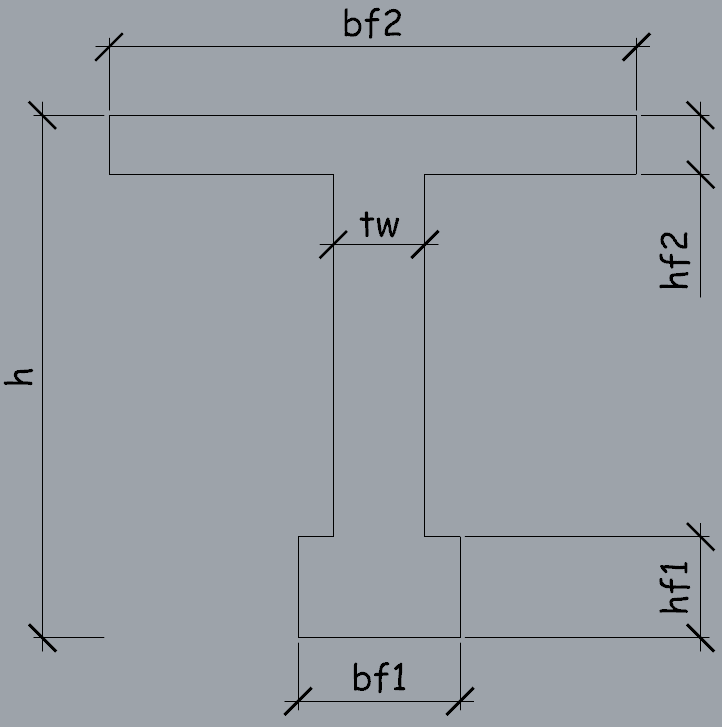

In [317]:
# Datos #
# Propiedades de los materiales (concreto y acero de presfuerzo)
Ec=3610 # klb/in2
nh=6 # Numero de alambres
A1_2=.144 # in2 # Area de un alambre de 1/2 in
Ap=nh*A1_2 # in2 # Area de los alambres
diam=1 # in # Diametro del acero de refuerzo
num=2 # Numero de barras de acero de refuerzo
As=pi*diam**2/4*num # in2 # Area de acero de refuerzo
Pe=123 # klb Fuerza de presfuerzo efectivo
Ep=27000 # klb/in2 # Modulo de elasticidad del acero de presfuerzo
Es=29000 # klb/in2 # Modulo de elasticidad del acero de refuerzo
fr=.5 # klb/in2 # Esfuerzo de rotura del concreto
np=Ep/Ec # Adimensional
ns=Es/Ec # Adimensional

# Propiedades fisicas de la viga pretensada
bf1=8 # in
bf2=16 # in
hf1=8 # in
hf2=5 # in
h=30 # in
tw=4 # in
dp=5 # in Distancia del presfuerzo a la fibra inferior
ds=3 # in Distancia del acero de refuerzo a la fibra inferior

# Determinacion de las propiedades de la seccion
Ac=hf1*bf1+hf2*bf2+tw*(h-(hf1+hf2))
cg=(hf1*bf1*hf1/2+tw*(h-(hf1+hf2))*((h-(hf1+hf2))/2+hf1)+hf2*bf2*(h-hf2/2))/Ac # in3 Centroide (*)
I=bf1*hf1**3/12+bf2*hf2**3/12+tw*(h-(hf1+hf2))**3/12+hf1*bf1*(cg-hf1/2)**2+hf2*bf2*(h-cg-hf2/2)**2+tw*(h-(hf1+hf2))*((h-(hf1+hf2))/2+hf1-cg)**2 # in4 # Inercia (*)
r=(I/Ac)**.5 # in Radio de giro (*)
s1=I/(h-cg) # in3 Modulo de seccion (*)
s2=I/cg # in3 Modulo de seccion (*)
ep=cg-dp # in Distancia del presfuerzo al centroide
es=cg-ds # in Distancia del acero de refuerzo a la fibra inferior

# Salida de resultados
print ("Area de la seccion: ",round(Ac,2)," in2")
print ("Centroide: ",round(cg,2)," in")
print ("Inercia: ",round(I,2)," in4")
print ("Radio de giro: ",round(r,2)," in")
print ("Modulo de seccion 1: ",round(s1,2)," in3")
print ("Modulo de seccion 2: ",round(s2,2)," in3")
print ('------------------------------------')
print ("Distancia del presfuerzo al centroide: ",round(ep,2)," in")
print ("Distancia del acero de refuerzo a la fibra inferior: ",round(es,2)," in")

Area de la seccion:  212  in2
Centroide:  16.88  in
Inercia:  21795.48  in4
Radio de giro:  10.14  in
Modulo de seccion 1:  1660.91  in3
Modulo de seccion 2:  1291.4  in3
------------------------------------
Distancia del presfuerzo al centroide:  11.88  in
Distancia del acero de refuerzo a la fibra inferior:  13.88  in


In [318]:
Mll=191*12 # klb-in Momento por Carga Viva
Mdl=38*12 # klb-in Momento por Carga Muerta
Mpp=83*12 # klb-in Momento por Peso Propio
Mt=sum([Mll,Mdl,Mpp]) # klb-in Momento Total
f2=-Pe/Ac*(1+ep*cg/r**2)+Mt/s2
print ("f2: ",round(f2,2)," klb/in2")
print ('------------------------------------')
if f2>fr:
    print ("f2: ",round(f2,2),"> fr: ",round(fr,2))
    print ("f2 sobrepasa el esfuerzo de rotura del concreto, Concreto Agrietado")
else:
    print ("f2: ",round(f2,2),"< fr: ",round(fr,2))
    print ("f2 no sobrepasa el esfuerzo de rotura del concreto, Concreto No Agrietado")

f2:  1.19  klb/in2
------------------------------------
f2:  1.19 > fr:  0.5
f2 sobrepasa el esfuerzo de rotura del concreto, Concreto Agrietado


In [319]:
-Pe/Ac*(1+ep*cg/r**2)

-1.7114503008384698

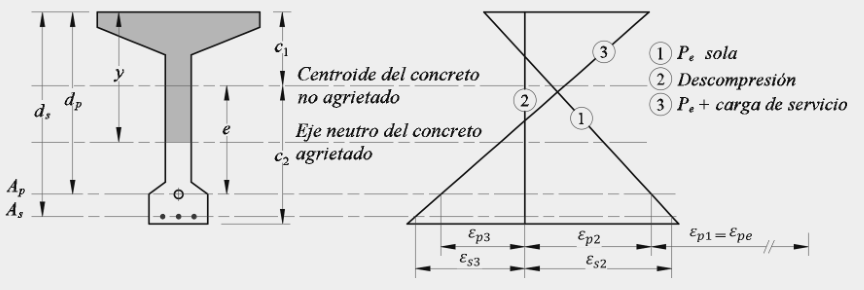

In [320]:
# Estado I
fp1=Pe/Ap # klb/in2 # 1er Esfuerzo del presfuerzo
print ("fp1: ",round(fp1,2)," klb/in2")

fp1:  142.36  klb/in2


In [321]:
# Estado II
e2=Pe/(Ac*Ec)*(1+ep**2/r**2) # Adimensional # 2da Deformacion del presfuerzo
fp2=Ep*e2 # klb/in2 # 2do Esfuerzo del presfuerzo a medida que el concreto se Descomprime
print ("fp2: ",round(fp2,2)," klb/in2")

fp2:  10.29  klb/in2


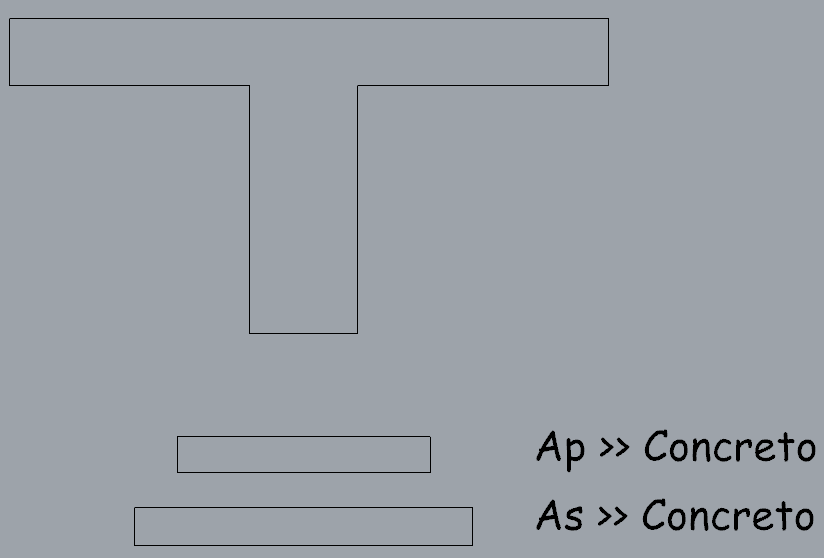

In [322]:
# Estado III
F=Ap*(fp1+fp2) # klb # Fuerza Ficticia para la Descompresion
R=F # klb # Fuerza igual a F pero opuesta
ex=(Mt-F*ep)/R
Apt=np*Ap # in2 # Area de acero del presfuerzo transformada en concreto
Ast=ns*As # in2 # Area de acero de refuerzo transformada en concreto
print ("F: ",round(F,2)," klb")
print ('ex: ',round(ex,2),' in')
print ('------------------------------------')
print ("Apt: ",round(Apt,2)," in2")
print ("Ast: ",round(Ast,2)," in2")

F:  131.89  klb
ex:  16.51  in
------------------------------------
Apt:  6.46  in2
Ast:  12.62  in2


In [323]:
print ('Escoger el valor de y ...')
y=symbols('y')
solve(Eq(y,Apt*(h-dp-y)/y*(h-dp+abs(h-cg-ex))+Ast*(h-ds-y)/y*(h-ds+abs(h-cg-ex))-(y*tw+hf2*(bf2-tw))*(abs(h-cg-ex)+y-(bf2*hf2*(y-hf2/2)+tw*(y-hf2)*(y-hf2)/2)/(bf2*hf2+tw*(y-hf2)))*1/2),y,dict=True)

Escoger el valor de y ...


[{y: 14.1686061565904},
 {y: -10.9707831968256 - 30.5612005349049*I},
 {y: -10.9707831968256 + 30.5612005349049*I}]

In [324]:
y=14.1 # in
# Encontrar el centroide de la seccion transformada
Act=Apt+Ast+tw*(y-hf2)+bf2*hf2
ct=(Apt*(h-dp)+Ast*(h-ds)+tw*(y-hf2)*(y+hf2)/2+hf2*bf2*hf2/2)/Act # in
It=Apt*(h-dp-ct)**2+Ast*(h-ds-ct)**2+tw*(y-hf2)**3/12+tw*(y-hf2)*(ct-hf2-(y-hf2)/2)**2+bf2*hf2**3/12+bf2*hf2*(ct-hf2/2)**2 # in4
et=ct+abs(-ex+h-cg)
print ('y: ',round(y,2),' in')
print ('Act: ',round(Act,2),' in2')
print ('ct: ',round(ct,2),' in')
print ('It: ',round(It,2),' in4')
print ('et: ',round(et,2),' in')

y:  14.1  in
Act:  135.48  in2
ct:  7.75  in
It:  9339.63  in4
et:  11.14  in


In [325]:
fc3=-R/Act-R*et*ct/It
fp3=np*(-R/Act+R*et*(h-dp-ct)/It)
fs3=ns*(-R/Act+R*et*(h-ds-ct)/It)
fp=sum([fp1,fp2,fp3])
print ('fp (Esfuerzo en el tendon): ',round(fp,2),' klb/in2')
print ('fs3 (Esfuerzo en el acero de refuerzo): ',round(fs3,2),' klb/in2')
print ('fc3 (Esfuerzo en la parte superior del concreto): ',round(fc3,2),' klb/in2')

fp (Esfuerzo en el tendon):  165.66  klb/in2
fs3 (Esfuerzo en el acero de refuerzo):  16.50  klb/in2
fc3 (Esfuerzo en la parte superior del concreto):  -2.19  klb/in2


***Amen ! Gracias mi Dios y Señor***

**Ejemplo 9**

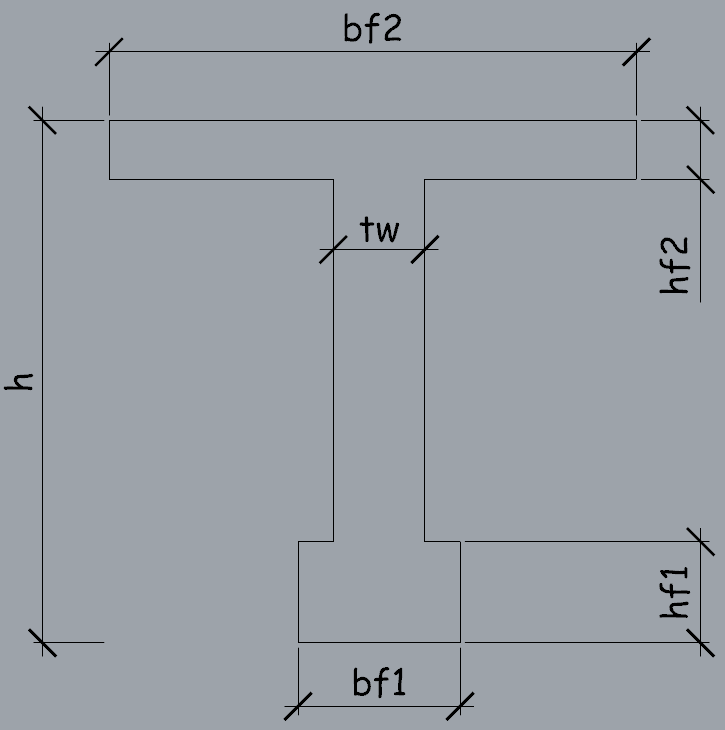

In [326]:
# Datos #
# Propiedades de los materiales (concreto y acero de presfuerzo)
fc=4 # klb/in2
Ec=57*(fc*10**3)**.5 # klb/in2
nh=7 # Numero de alambres
A1_2=.144 # in2 # Area de un alambre de 1/2 in
Ap=nh*A1_2 # in2 # Area de los alambres
R=87.5/100 # Adimensional # Razon de presfuerzo efectivo-inicial
Pe=180*R # klb Fuerza de presfuerzo efectivo
Ep=27000 # klb/in2 # Modulo de elasticidad del acero de presfuerzo
fr=.5 # klb/in2 # Esfuerzo de rotura del concreto
np=Ep/Ec # Adimensional
beta1=.85 # Adimensional
ecu=.003 # Adimensional

# Propiedades fisicas de la viga pretensada
bf1=9 # in
bf2=22 # in
hf1=5 # in
hf2=4 # in
h=26 # in
tw=4 # in
dp=6.5 # in Distancia del presfuerzo a la fibra inferior

# Determinacion de las propiedades de la seccion
Ac=hf1*bf1+hf2*bf2+tw*(h-(hf1+hf2))
cg=(hf1*bf1*hf1/2+tw*(h-(hf1+hf2))*((h-(hf1+hf2))/2+hf1)+hf2*bf2*(h-hf2/2))/Ac # in3 Centroide (*)
I=bf1*hf1**3/12+bf2*hf2**3/12+tw*(h-(hf1+hf2))**3/12+hf1*bf1*(cg-hf1/2)**2+hf2*bf2*(h-cg-hf2/2)**2+tw*(h-(hf1+hf2))*((h-(hf1+hf2))/2+hf1-cg)**2 # in4 # Inercia (*)
r=(I/Ac)**.5 # in Radio de giro (*)
s1=I/(h-cg) # in3 Modulo de seccion (*)
s2=I/cg # in3 Modulo de seccion (*)
ep=cg-dp # in Distancia del presfuerzo al centroide

# Salida de resultados
print ("Area de la seccion: ",round(Ac,2)," in2")
print ("Centroide: ",round(cg,2)," in")
print ("Inercia: ",round(I,2)," in4")
print ("Radio de giro: ",round(r,2)," in")
print ("Modulo de seccion 1: ",round(s1,2)," in3")
print ("Modulo de seccion 2: ",round(s2,2)," in3")
print ('------------------------------------')
print ("Distancia del presfuerzo al centroide: ",round(ep,2)," in")

Area de la seccion:  201  in2
Centroide:  15.63  in
Inercia:  16080.12  in4
Radio de giro:  8.94  in
Modulo de seccion 1:  1551.29  in3
Modulo de seccion 2:  1028.51  in3
------------------------------------
Distancia del presfuerzo al centroide:  9.13  in


In [327]:
# Estado I
fpe=Pe/Ap # klb/in2 Esfuerzo de presfuerzo efectivo
epe=fpe/Ep # Adimensional 1ra Deformacion del presfuerzo
e1=epe
print ("Esfuerzo de presfuerzo efectivo: ",round(fpe,2)," klb/in2")
print ("1ra Deformacion del presfuerzo: ",round(e1,6))

Esfuerzo de presfuerzo efectivo:  156.25  klb/in2
1ra Deformacion del presfuerzo:  0.005787


In [328]:
# Estado II
e2=Pe/(Ac*Ec)*(1+ep**2/r**2) # Adimensional 2da Deformacion del presfuerzo
print ("2da Deformacion del presfuerzo: ",round(e2,6))

2da Deformacion del presfuerzo:  0.000444


In [329]:
# Estado III
fpf1=230 # klb/in2 Esfuerzo de falla para el presfuerzo
epf1=0.02 # Adimensional Deformacion para el esfuerzo de falla
a1=Ap*fpf1/(.85*fc*bf2) # in Profundidad de la zona de compresion
c1=a1/beta1 # in Distancia del Eje Neutro a la fibra en compresion
d1=ep+(h-cg) # in Distancia de la fibra superior al tendon
e3=ecu*(d1-c1)/c1 # Adimensional 3ra Deformacion del presfuerzo
et=sum([e1,e2,e3]) # Adimensional Deformacion total del presfuerzo

dif=et-epf1 # Adimensional Diferencia entre la deformacion total y la de la grafica

print ("3ra Deformacion del presfuerzo: ",round(e3,6))
print ("Deformacion total del presfuerzo: ",round(et,6))
print ("Diferencia entre la deformacion total y la de la grafica: ",round(dif,6))

3ra Deformacion del presfuerzo:  0.013043
Deformacion total del presfuerzo:  0.019274
Diferencia entre la deformacion total y la de la grafica:  -0.000726


In [330]:
# Momento Nominal
Mn=Ap*fpf1*(d1-a1/2) # klb-in Momento Nominal
print ("Momento Nominal: ",round(Mn,2)," klb-in")

Momento Nominal:  4161.59  klb-in


***Gracias mi Dios ! Amen ...***

***EJERCICIO CONTINUA***

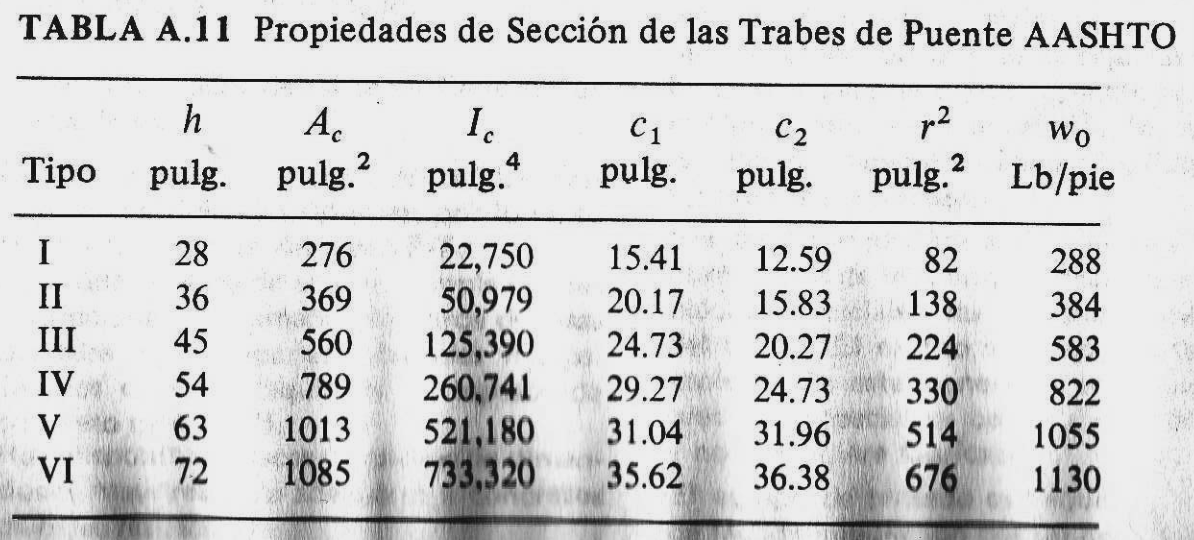

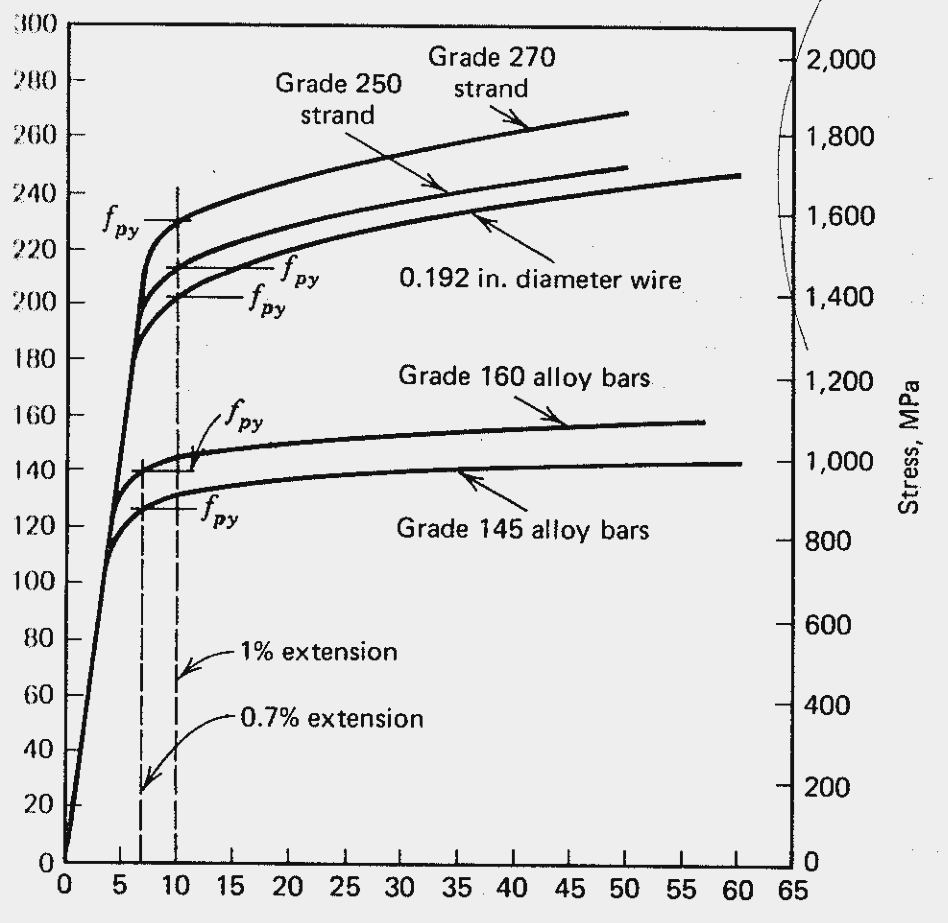

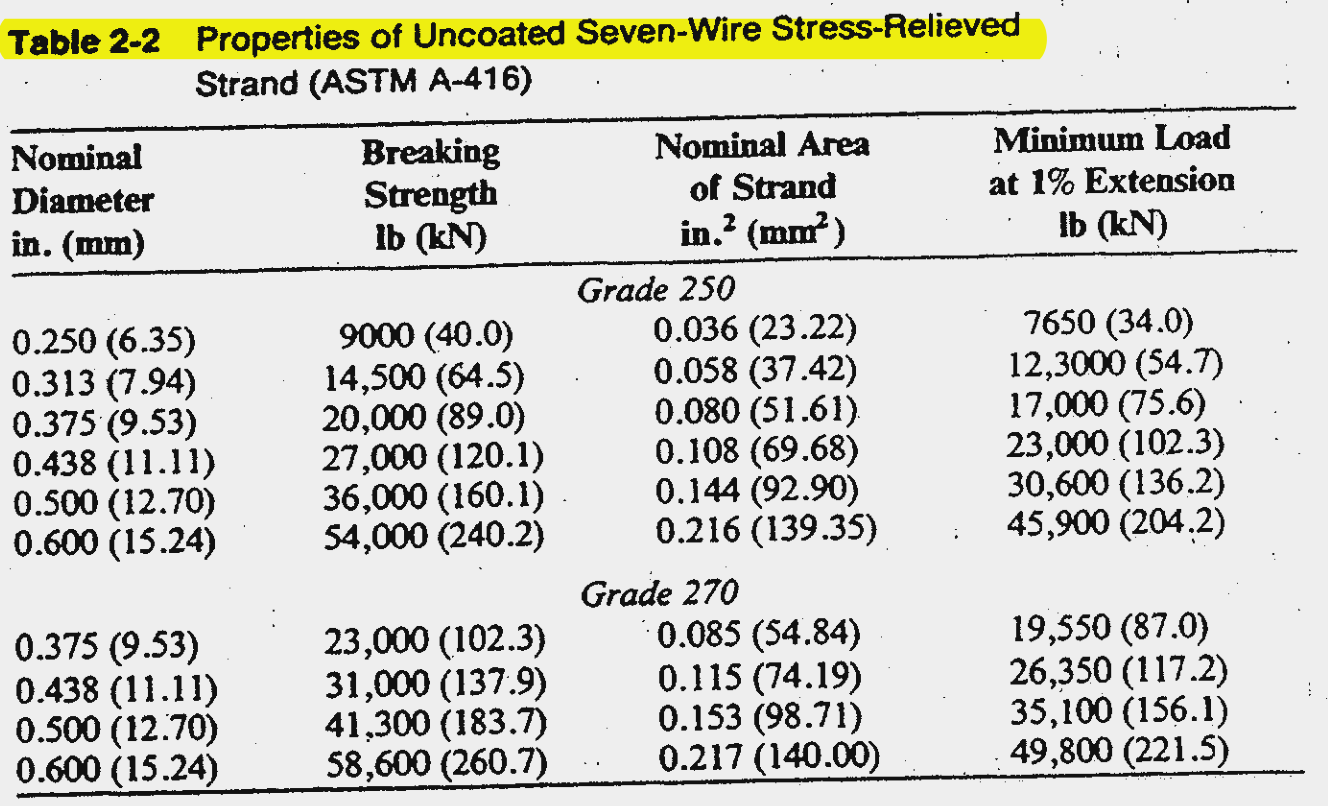

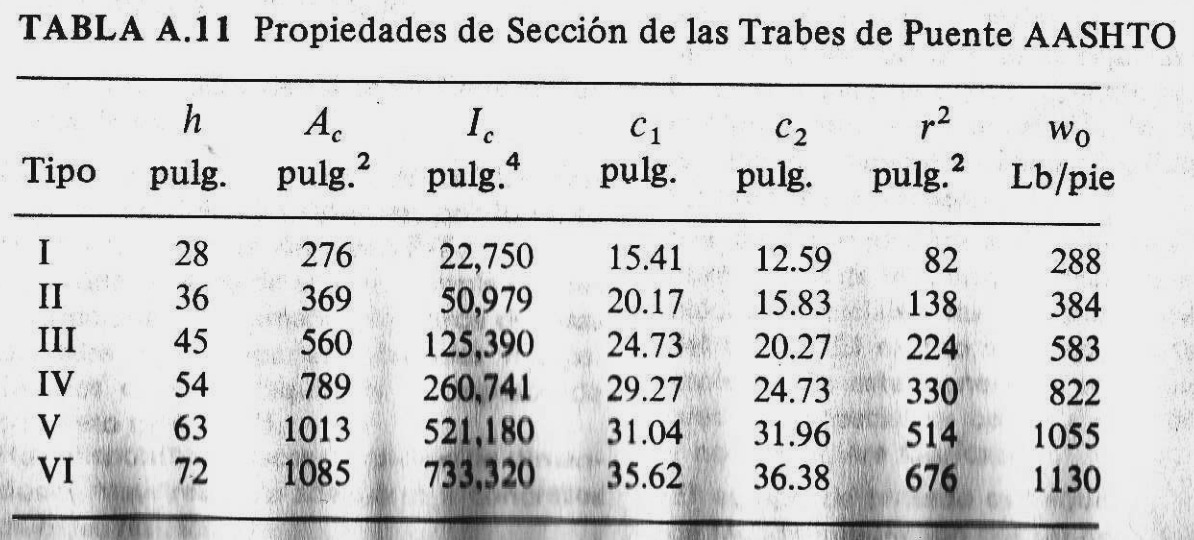

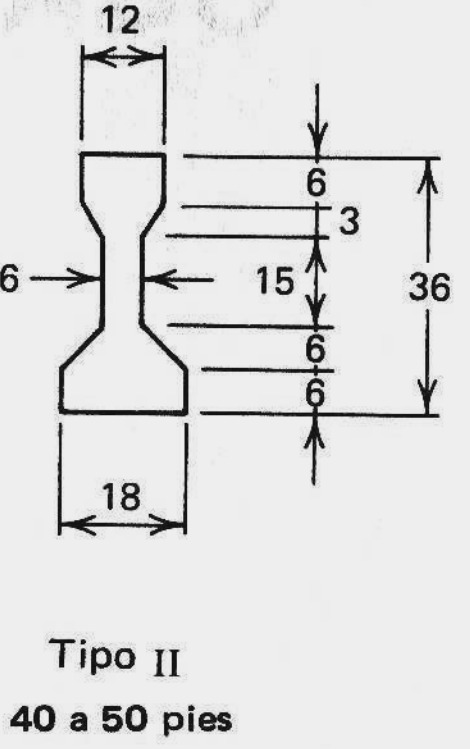

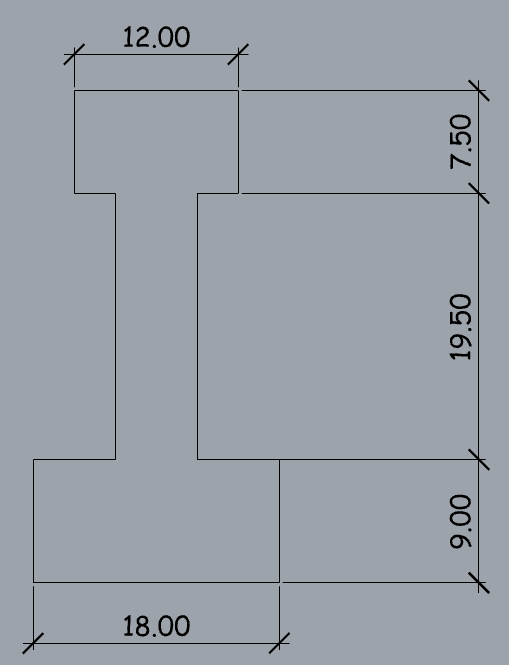

In [331]:
from sympy import *

In [332]:
# Datos #
l=50 # ft Longitud de la viga
# Propiedades de los materiales (concreto y acero de presfuerzo)
fc=5 # ksi
Ec=57000*(fc*1000)**.5 # ksi
ecu=0.003
nh=29 # Numero de alambres
A1_2=.085 # in2 # Area de un alambre de 1/2 in
Ap=nh*A1_2 # in2 # Area de los alambres
Pi=432 # kip Fuerza de presfuerzo inicial
Pe=367 # klb Fuerza de presfuerzo efectivo
Ep=27000 # klb/in2 # Modulo de elasticidad del acero de presfuerzo
fr=.53 # klb/in2 # Esfuerzo de rotura del concreto
np=Ep/Ec # Adimensional
# Determinacion de las propiedades de la seccion
Ac=369 # in2 Area de la seccion
cg=15.41 # in3 Centroide (*)
I=50979 # in4 # Inercia (*)
r=(I/Ac)**.5 # in Radio de giro (*)
s2=I/cg # in3 Modulo de seccion (*)
eg=12.5 # in Distancia del presfuerzo al centroide
beta=0.85-0.05*(fc-4) # Adimensional

# Salida de resultados
print ("Area de la seccion: ",round(Ac,2)," in2")
print ("Centroide: ",round(cg,2)," in")
print ("Inercia: ",round(I,2)," in4")
print ("Radio de giro: ",round(r,2)," in")
print ("Modulo de seccion 2: ",round(s2,2)," in3")

Area de la seccion:  369  in2
Centroide:  15.41  in
Inercia:  50979  in4
Radio de giro:  11.75  in
Modulo de seccion 2:  3308.18  in3


In [333]:
fpe=Pe/Ap # ksi # Esfuerzo de presfuerzo efectivo
epse=fpe/Ep # Adimensional # 1ra Deformacion del presfuerzo
e1=epse
e2=Pe/(Ac*Ec)*(1+eg**2/r**2) # Adimensional # 2da Deformacion del presfuerzo
print ("Esfuerzo de presfuerzo efectivo: ",round(fpe,2)," ksi")
print ("1ra Deformacion del presfuerzo: ",round(e1,6)," Adimensional")
print ("2da Deformacion del presfuerzo: ",round(e2,6)," Adimensional")


Esfuerzo de presfuerzo efectivo:  148.88  ksi
1ra Deformacion del presfuerzo:  0.005514  Adimensional
2da Deformacion del presfuerzo:  1e-06  Adimensional


In [334]:
# 1ra Suposicion (Esfuerzo de falla para el presfuerzo)
fpf1=220 # ksi Esfuerzo de falla para el presfuerzo

# De la grafica la deformacion para este esfuerzo es de 0.007
epf1=0.008 # Adimensional Deformacion para el esfuerzo de falla

bf=12 # in
hf=7.5 # in
h=36 # in
d=h-7 # in Peralte efectivo

a=Ap*fpf1/(.85*fc*bf) # cm Profundidad de la zona de compresion
c=a/beta # cm Distancia del Eje Neutro a la fibra en compresion
e3=ecu*(d-c)/c # Adimensional # 3ra Deformacion del presfuerzo
et=sum([e1,e2,e3]) # Adimensional # Deformacion total del presfuerzo

# Comparamos este valor con la deformacion de la grafica
dif=et-epf1 # Adimensional # Diferencia entre la deformacion total y la de la grafica
print ("Deformacion total del presfuerzo: ",round(et,6))
print ("Diferencia entre la deformacion total y la de la grafica: ",round(dif,6))

Deformacion total del presfuerzo:  0.00906
Diferencia entre la deformacion total y la de la grafica:  0.00106


In [335]:
fps=et*Ep
Mn=Ap*fps*(d-a/2)/12 # kip-ft Momento Nominal
print ("Momento Nominal: ",round(Mn,2)," kip-ft")

Momento Nominal:  1190.09  kip-ft


*Comentario: El acero de presfuerzo falla antes de estar en fluencia*

**2da Solucion**

In [336]:
# Datos #
l=50 # ft Longitud de la viga
# Propiedades de los materiales (concreto y acero de presfuerzo)
fc=5 # ksi
Ec=57000*(fc*1000)**.5 # ksi
nh=29 # Numero de alambres
A1_2=.085 # in2 # Area de un alambre de 1/2 in
Ap=nh*A1_2 # in2 # Area de los alambres
Pi=432 # kip Fuerza de presfuerzo inicial
Pe=367 # klb Fuerza de presfuerzo efectivo
Ep=27000 # klb/in2 # Modulo de elasticidad del acero de presfuerzo
fr=.53 # klb/in2 # Esfuerzo de rotura del concreto
np=Ep/Ec # Adimensional

# Propiedades fisicas de la viga pretensada
bf1=18 # in
bf2=12 # in
hf1=9 # in
hf2=7.5 # in
h=36 # in
tw=6 # in

# Determinacion de las propiedades de la seccion
Ac=hf1*bf1+hf2*bf2+tw*(h-(hf1+hf2))
cg=(hf1*bf1*hf1/2+tw*(h-(hf1+hf2))*((h-(hf1+hf2))/2+hf1)+hf2*bf2*(h-hf2/2))/Ac # in3 Centroide (*)
I=bf1*hf1**3/12+bf2*hf2**3/12+tw*(h-(hf1+hf2))**3/12+hf1*bf1*(cg-hf1/2)**2+hf2*bf2*(h-cg-hf2/2)**2+tw*(h-(hf1+hf2))*((h-(hf1+hf2))/2+hf1-cg)**2 # in4 # Inercia (*)
r=(I/Ac)**.5 # in Radio de giro (*)
s1=I/(h-cg) # in3 Modulo de seccion (*)
s2=I/cg # in3 Modulo de seccion (*)
ep=12.5 # in Distancia del presfuerzo al centroide

# Salida de resultados
print ("Area de la seccion: ",round(Ac,2)," in2")
print ("Centroide: ",round(cg,2)," in")
print ("Inercia: ",round(I,2)," in4")
print ("Radio de giro: ",round(r,2)," in")
print ("Modulo de seccion 1: ",round(s1,2)," in3")
print ("Modulo de seccion 2: ",round(s2,2)," in3")
print ('------------------------------------')
print ("Distancia del presfuerzo al centroide: ",round(ep,2)," in")

Area de la seccion:  369.0  in2
Centroide:  15.79  in
Inercia:  51280.94  in4
Radio de giro:  11.79  in
Modulo de seccion 1:  2536.98  in3
Modulo de seccion 2:  3248.39  in3
------------------------------------
Distancia del presfuerzo al centroide:  12.5  in


In [337]:
Mcs=509*12 # klb-in Momento por Carga de Servicio
Mpp=120*12 # klb-in Momento por Peso Propio
Mt=sum([Mcs,Mpp]) # klb-in Momento Total

In [339]:
# Datos #
l=50 # ft Longitud de la viga
# Propiedades de los materiales (concreto y acero de presfuerzo)
fc=5 # ksi
Ec=57000*(fc*1000)**.5 # ksi
ecu=0.003
nh=29 # Numero de alambres
A1_2=.085 # in2 # Area de un alambre de 1/2 in
Ap=nh*A1_2 # in2 # Area de los alambres
Pi=432 # kip Fuerza de presfuerzo inicial
Pe=367 # klb Fuerza de presfuerzo efectivo
Ep=27000 # klb/in2 # Modulo de elasticidad del acero de presfuerzo
fr=.53 # klb/in2 # Esfuerzo de rotura del concreto
np=Ep/Ec # Adimensional
# Determinacion de las propiedades de la seccion
Ac=369 # in2 Area de la seccion
cg=15.41 # in3 Centroide (*)
I=50979 # in4 # Inercia (*)
r=(I/Ac)**.5 # in Radio de giro (*)
s2=I/cg # in3 Modulo de seccion (*)
eg=12.5 # in Distancia del presfuerzo al centroide
beta=0.85-0.05*(fc-4) # Adimensional

# Salida de resultados
print ("Area de la seccion: ",round(Ac,2)," in2")
print ("Centroide: ",round(cg,2)," in")
print ("Inercia: ",round(I,2)," in4")
print ("Radio de giro: ",round(r,2)," in")
print ("Modulo de seccion 2: ",round(s2,2)," in3")

fpe=Pe/Ap # ksi # Esfuerzo de presfuerzo efectivo
epse=fpe/Ep # Adimensional # 1ra Deformacion del presfuerzo
e1=epse
e2=Pe/(Ac*Ec)*(1+eg**2/r**2) # Adimensional # 2da Deformacion del presfuerzo
print ("Esfuerzo de presfuerzo efectivo: ",round(fpe,2)," ksi")
print ("1ra Deformacion del presfuerzo: ",round(e1,6)," Adimensional")
print ("2da Deformacion del presfuerzo: ",round(e2,6)," Adimensional")

# Suposicion (Esfuerzo de falla para el presfuerzo)
fpf1=220 # ksi Esfuerzo de falla para el presfuerzo

# De la grafica la deformacion para este esfuerzo es de 0.008
epf1=0.008 # Adimensional Deformacion para el esfuerzo de falla

bf=12 # in
hf=7.5 # in
h=36
d=h-7 # in Peralte efectivo

a=Ap*fpf1/(.85*fc*bf) # cm Profundidad de la zona de compresion
c=a/beta # cm Distancia del Eje Neutro a la fibra en compresion
e3=ecu*(d-c)/c # Adimensional # 3ra Deformacion del presfuerzo
et=sum([e1,e2,e3]) # Adimensional # Deformacion total del presfuerzo

# Comparamos este valor con la deformacion de la grafica
dif=et-epf1 # Adimensional # Diferencia entre la deformacion total y la de la grafica
print ("Deformacion total del presfuerzo: ",round(et,6))
print ("Diferencia entre la deformacion total y la de la grafica: ",round(dif,6))

fps=et*Ep
Mn=Ap*fps*(d-a/2)/12 # kip-ft Momento Nominal
print ("Momento Nominal: ",round(Mn,2)," kip-ft")

Area de la seccion:  369  in2
Centroide:  15.41  in
Inercia:  50979  in4
Radio de giro:  11.75  in
Modulo de seccion 2:  3308.18  in3
Esfuerzo de presfuerzo efectivo:  148.88  ksi
1ra Deformacion del presfuerzo:  0.005514  Adimensional
2da Deformacion del presfuerzo:  1e-06  Adimensional
Deformacion total del presfuerzo:  0.00906
Diferencia entre la deformacion total y la de la grafica:  0.00106
Momento Nominal:  1190.09  kip-ft
